# MNIST クラスタ分析

https://www.kaggle.com/mtax687/explorations-of-fashion-mnist-dataset


In [1]:
!pip install sklearn
!pip install numpy
!pip install seaborn
!pip install umap-learn
!pip install pyclustering

import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA  # PCA

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def get_pca(X, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(X)
    return pca.transform(X)

def load_mnist(path, kind='train'):

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

# visualization
def draw_image(data, row, col, n, title:str = None):
    ax = plt.subplot(row, col, n)
    ax.axis("off")
    if title is not None:
        ax.set_title(title, fontdict={'fontsize':8})
    plt.imshow(data, cmap = "gray")

def draw_text(text, row, col, n):
    ax = plt.subplot(row, col, n)
    ax.axis("off")

    # build a rectangle in axes coords
    left, width = .25, .5
    bottom, height = .25, .5
    right = left + width
    top = bottom + height
    ax.text(0.5*(left+right), 0.5*(bottom+top), text,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=12, color='black',
        transform=ax.transAxes)

def plot_image(X_image, indexes, row=1, col=10, image_size=28, title:str = None, figsize=(10, 2)):
    fig = plt.figure(figsize=figsize)
    if title is not None:
#         plt.gcf().text(0.0, 0.0, title)
#         fig.suptitle(title)
        fig.suptitle(title, fontsize=20, y=0.91)
        plt.subplots_adjust(wspace=0.2, hspace=0.25)
    offset = 0
    for index in indexes:
        offset += 1
        draw_image(X_image[index].reshape(image_size,image_size), row, col, offset, index)
    plt.show()

def plot_hist_image(X_image, indexes, row=1, col=10):
    """ヒストグラム作成
    """
    
    fig = plt.figure(figsize=(10, 1))
    offset = 0
    for index in indexes:
        offset += 1

        # ヒストグラムの取得
        img_hist, _ = np.histogram(np.array(X_image[index]).flatten(), bins=np.arange(256+1))

        # ヒストグラムの表示
        ax = plt.subplot(row, col, offset)
        ax.axis("off")
        plt.plot(img_hist, color='black', linewidth = 1)
    plt.show()

    
def plot_image_and_hist(X_image, indexes, prefix, n_class, row=20, col=10):
   
    fig = plt.figure(figsize=(10, 20))
    fig.suptitle(f'{prefix} Analyze Class:{n_class}', fontsize=20, y=0.925)
    plt.subplots_adjust(wspace=0.2, hspace=0.4)

    offset = 0
    for index in indexes:
        offset += 1

        # 画像表示
        draw_image(X_image[index].reshape(28,28), row, col, offset, str(index))

        # ヒストグラムの取得
        img_hist, _ = np.histogram(np.array(X_image[index]).flatten(), bins=np.arange(256+1))
        # ヒストグラムの表示
        ax = plt.subplot(row, col, offset+col)
        ax.axis("off")
        plt.plot(img_hist, color='black', linewidth = 1)

        if offset % col == 0:
            # ヒストグラム行を飛ばす
            offset += col

    plt.show()


     |████████████████████████████████| 6.8 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 300 kB 11.8 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=2397 sha256=20884f54e4170faba35222b60f026336b97c3fda74f6d358fbe91e276e13a1d6
  Stored in directory: /root/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 283 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 10.5 MB 10.1 MB/s eta 0:00:01    |█▏                              | 389 kB 10.1 MB/s eta 0:00:01     |██████████████████████▍         | 7.3 MB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 11.6 MB/s eta 0:00:01
You should consider upgrading via the '/usr/

In [2]:
# 画像クラスタリング x-mean
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from IPython.display import display, HTML # Jupyter notebook用
%matplotlib inline

class XMeans:
    """
    x-means法を行うクラス
    """

    def __init__(self, k_init = 2, **k_means_args):
        """
        k_init : The initial number of clusters applied to KMeans()
        """
        self.k_init = k_init
        self.k_means_args = k_means_args

    def fit(self, X):
        """
        x-means法を使ってデータXをクラスタリングする
        X : array-like or sparse matrix, shape=(n_samples, n_features)
        """
        self.__clusters = [] 

        clusters = self.Cluster.build(X, KMeans(self.k_init, **self.k_means_args).fit(X))
        self.__recursively_split(clusters)

        self.labels_ = np.empty(X.shape[0], dtype = np.intp)
        for i, c in enumerate(self.__clusters):
            self.labels_[c.index] = i

        self.cluster_centers_ = np.array([c.center for c in self.__clusters])
        self.cluster_log_likelihoods_ = np.array([c.log_likelihood() for c in self.__clusters])
        self.cluster_sizes_ = np.array([c.size for c in self.__clusters])

        return self

    def __recursively_split(self, clusters):
        """
        引数のclustersを再帰的に分割する
        clusters : list-like object, which contains instances of 'XMeans.Cluster'
        'XMeans.Cluster'のインスタンスを含むリスト型オブジェクト
        """
        for cluster in clusters:
            if cluster.size <= 3:
                self.__clusters.append(cluster)
                continue

            k_means = KMeans(2, **self.k_means_args).fit(cluster.data)
            c1, c2 = self.Cluster.build(cluster.data, k_means, cluster.index)

            if np.linalg.det(c1.cov) == 0 and np.linalg.det(c2.cov) == 0:
                  beta = 0
            else:
                  beta = np.linalg.norm(c1.center - c2.center) / np.sqrt(np.linalg.det(c1.cov) + np.linalg.det(c2.cov))
            
            alpha = 0.5 / stats.norm.cdf(beta)
            bic = -2 * (cluster.size * np.log(alpha) + c1.log_likelihood() + c2.log_likelihood()) + 2 * cluster.df * np.log(cluster.size)

            if bic < cluster.bic():
                self.__recursively_split([c1, c2])
            else:
                self.__clusters.append(cluster)

    class Cluster:
        """
        k-means法によって生成されたクラスタに関する情報を持ち、尤度やBICの計算を行うクラス
        """

        @classmethod
        def build(cls, X, k_means, index = None): 
            if index is None:
                index = np.array(range(0, X.shape[0]))
            labels = range(0, k_means.get_params()["n_clusters"])  

            return tuple(cls(X, index, k_means, label) for label in labels) 

        # index: Xの各行におけるサンプルが元データの何行目のものかを示すベクトル
        def __init__(self, X, index, k_means, label):
            self.data = X[k_means.labels_ == label]
            self.index = index[k_means.labels_ == label]
            self.size = self.data.shape[0]
            self.df = self.data.shape[1] * (self.data.shape[1] + 3) / 2
            self.center = k_means.cluster_centers_[label]
            self.cov = np.cov(self.data.T)

        def log_likelihood(self):
            return sum(stats.multivariate_normal.logpdf(x, self.center, self.cov) for x in self.data)

        def bic(self):
            return -2 * self.log_likelihood() + self.df * np.log(self.size)

In [3]:
# load data

X_target, y_target = load_mnist('../data/Fashion-MNIST', kind='train')

# 前処理として、画像を最大値255で割って0.0 - 1.0に規格化する。
X_target_n = X_target / 255

print(type(X_target))
print(X_target.shape)

<class 'numpy.ndarray'>
(60000, 784)


In [4]:
classes = np.unique(y_target)
target_indexes={}

# クラス分類
for c in classes:
    target_indexes[c] = np.where(y_target == c)[0]

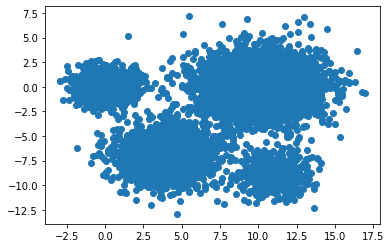

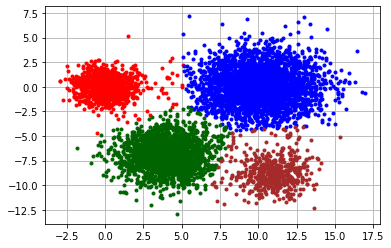

<AxesSubplot:>

In [5]:
# 2次元のx-means例

import pyclustering
from pyclustering.cluster import xmeans
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

arr_1 = np.random.normal(scale=1.0, size=(1000, 2))
arr_2 = np.random.normal(scale=2.0, size=(3000, 2))
arr_3 = np.random.normal(scale=1.5, size=(2000, 2))
arr_4 = np.random.normal(scale=1.2, size=(500, 2))
arr_2[:, 0] += 10
arr_3[:, 0] += 4
arr_3[:, 1] += -7
arr_4[:, 0] += 11
arr_4[:, 1] += -9
X = np.concatenate([
    arr_1,
    arr_2,
    arr_3,
    arr_4,
])

plt.scatter(x=X[:, 0], y=X[:, 1])

initializer = xmeans.kmeans_plusplus_initializer(data=X, amount_centers=2)
initial_centers = initializer.initialize()
xm = xmeans.xmeans(data=X, initial_centers=initial_centers)
xm.process()
clusters = xm.get_clusters()
pyclustering.utils.draw_clusters(data=X, clusters=clusters)

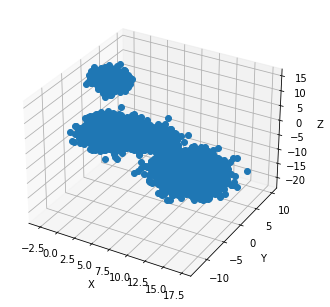

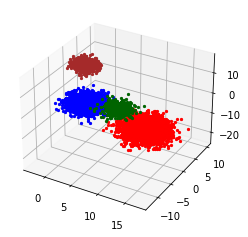

In [6]:
# 3次元のx-means例

arr_1 = np.random.normal(scale=1.0, size=(1000, 3))
arr_2 = np.random.normal(scale=2.0, size=(3000, 3))
arr_3 = np.random.normal(scale=1.5, size=(2000, 3))
arr_4 = np.random.normal(scale=1.2, size=(500, 3))
arr_1[:, 2] += 13
arr_2[:, 0] += 10
arr_2[:, 1] += 3
arr_2[:, 2] += -15
arr_3[:, 0] += 4
arr_3[:, 1] += -7
arr_3[:, 2] += 5
arr_4[:, 0] += 11
arr_4[:, 1] += -9
arr_4[:, 2] += 10
X = np.concatenate([
    arr_1,
    arr_2,
    arr_3,
    arr_4,
])

#3次元プロットするためのモジュール
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.plot(X[:, 0],X[:, 1],X[:, 2],marker="o",linestyle='None')
plt.show()


initializer = xmeans.kmeans_plusplus_initializer(data=X, amount_centers=2)
initial_centers = initializer.initialize()
xm = xmeans.xmeans(data=X, initial_centers=initial_centers)
xm.process()
clusters = xm.get_clusters()
ax = pyclustering.utils.draw_clusters(data=X, clusters=clusters)

Class:0 cluster num=51


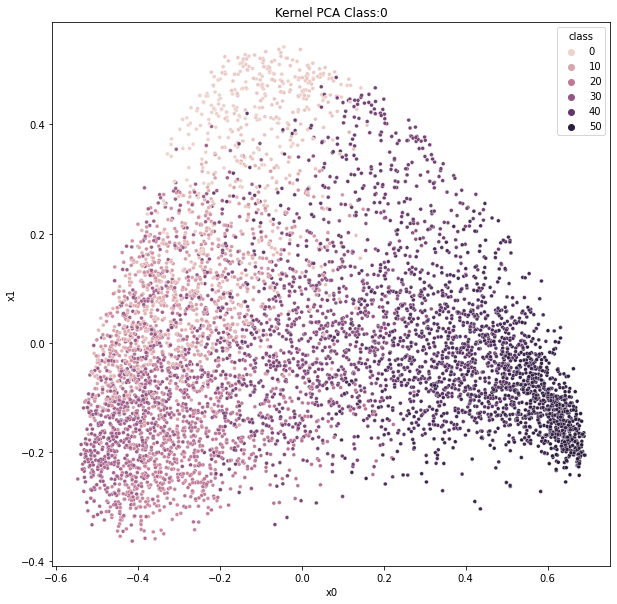

In [25]:
# カーネル主成分分析

import pandas as pd
from sklearn.decomposition import KernelPCA

def calc_xmean(c, n_components = 64, gamma = 0.01):

    pca = KernelPCA(n_components=n_components, kernel="rbf" ,gamma=gamma)
    X = pca.fit_transform(X_target_n[target_indexes[c]])
#     X = get_pca(X_target_n[target_indexes[c]], n_components)
#     X = X_target_n[target_indexes[c]]
    initializer = xmeans.kmeans_plusplus_initializer(data=X, amount_centers=2)
    initial_centers = initializer.initialize()
    xm = xmeans.xmeans(data=X, initial_centers=initial_centers, kmax=128)
    xm.process()

    clusters = xm.get_clusters()
    centers = xm.get_centers()
    print('Class:{} cluster num={}'.format(c, len(clusters)))
    
    # クラスタ単位の情報分析
    class_pred = [0] * len(target_indexes[c])
    cls_no = 0
    for cls_index, cls_center in zip(clusters, centers):

        # 中心点と各画像の最長距離、平均距離を算出
        distancies = []
        for i in cls_index:
            class_pred[i] = cls_no
            distancies.append(np.linalg.norm(cls_center - X[i]))

#         print('Class:{} / Cluster:{} image num={} mean_distance={} max_distance={}'.format(
#             c, cls_no, len(cls_index), np.mean(distancies), np.max(distancies)))

#         row_num = (len(cls_index)/10)+1
#         plot_image(X_target, target_indexes[c][cls_index], row=row_num, col=10, title=f'{cls_no}', figsize=(10, 1.2*row_num))

        cls_no+=1

    # 2次元に次元圧縮して可視化
    pca = KernelPCA(n_components= 2, kernel="rbf" ,gamma=gamma)
    X = pca.fit_transform(X_target_n[target_indexes[c]])

    pca_pd = pd.DataFrame(X)
    pca_pd["class"]= class_pred
    pca_pd.columns = ["x0","x1", "class"]
    fig = plt.figure(figsize=(10, 10))
    plt.title(f'Kernel PCA Class:{c}')
    sns.scatterplot(x="x0", y= "x1", hue="class", data=pca_pd, s=15, ) 

calc_xmean(c=0, n_components=256, gamma=0.01)

# for c in classes:
#     calc_xmean(c)

Class:0 cluster num=40


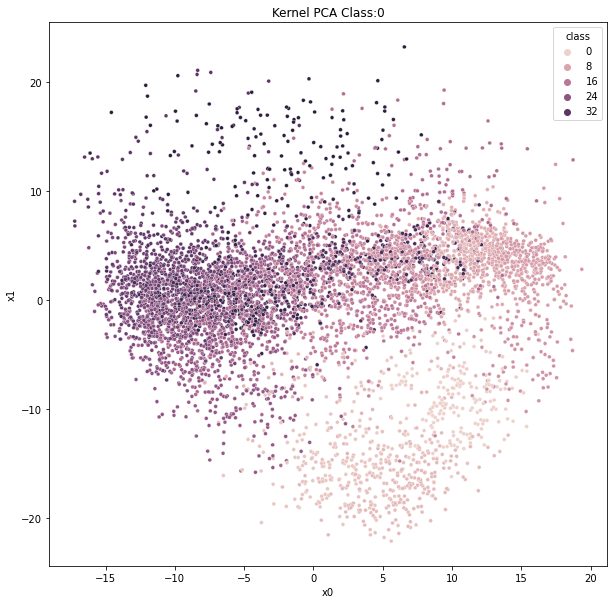

In [36]:
# Isomap

import pandas as pd
from sklearn import  manifold #機械学習用のライブラリを利用


def calc_xmean(c, n_components=64, n_neighbors=10):

    isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
    X = isomap.fit_transform(X_target_n[target_indexes[c]])

    initializer = xmeans.kmeans_plusplus_initializer(data=X, amount_centers=2)
    initial_centers = initializer.initialize()
    xm = xmeans.xmeans(data=X, initial_centers=initial_centers, kmax=128)
    xm.process()

    clusters = xm.get_clusters()
    centers = xm.get_centers()
    print('Class:{} cluster num={}'.format(c, len(clusters)))
    
    # クラスタ単位の情報分析
    class_pred = [0] * len(target_indexes[c])
    cls_no = 0
    for cls_index, cls_center in zip(clusters, centers):

        # 中心点と各画像の最長距離、平均距離を算出
        distancies = []
        for i in cls_index:
            class_pred[i] = cls_no
            distancies.append(np.linalg.norm(cls_center - X[i]))

#         print('Class:{} / Cluster:{} image num={} mean_distance={} max_distance={}'.format(
#             c, cls_no, len(cls_index), np.mean(distancies), np.max(distancies)))

#         row_num = (len(cls_index)/10)+1
#         plot_image(X_target, target_indexes[c][cls_index], row=row_num, col=10, title=f'{cls_no}', figsize=(10, 1.2*row_num))

        cls_no+=1

    # 2次元に次元圧縮して可視化
    isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=2)
    X = isomap.fit_transform(X_target_n[target_indexes[c]])

    pca_pd = pd.DataFrame(X)
    pca_pd["class"]= class_pred
    pca_pd.columns = ["x0","x1", "class"]
    fig = plt.figure(figsize=(10, 10))
    plt.title(f'Kernel PCA Class:{c}')
    sns.scatterplot(x="x0", y= "x1", hue="class", data=pca_pd, s=15, ) 

calc_xmean(c=0, n_components=420, n_neighbors=10)

# for c in classes:
#     calc_xmean(c)

Class:0 cluster num=128


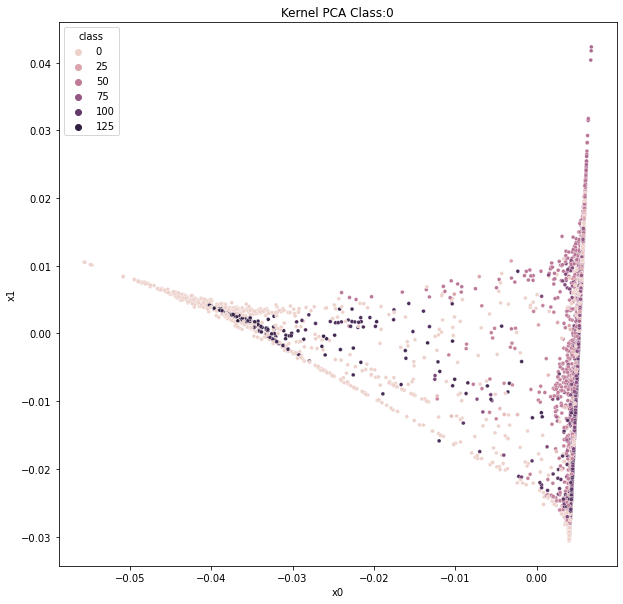

In [34]:
# LLE

import pandas as pd
from sklearn import  manifold #機械学習用のライブラリを利用


def calc_xmean(c, n_components = 64, n_neighbors=10):

    lle = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)
    X = lle.fit_transform(X_target_n[target_indexes[c]])
    
    initializer = xmeans.kmeans_plusplus_initializer(data=X, amount_centers=2)
    initial_centers = initializer.initialize()
    xm = xmeans.xmeans(data=X, initial_centers=initial_centers, kmax=128)
    xm.process()

    clusters = xm.get_clusters()
    centers = xm.get_centers()
    print('Class:{} cluster num={}'.format(c, len(clusters)))
    
    # クラスタ単位の情報分析
    class_pred = [0] * len(target_indexes[c])
    cls_no = 0
    for cls_index, cls_center in zip(clusters, centers):

        # 中心点と各画像の最長距離、平均距離を算出
        distancies = []
        for i in cls_index:
            class_pred[i] = cls_no
            distancies.append(np.linalg.norm(cls_center - X[i]))

#         print('Class:{} / Cluster:{} image num={} mean_distance={} max_distance={}'.format(
#             c, cls_no, len(cls_index), np.mean(distancies), np.max(distancies)))

#         row_num = (len(cls_index)/10)+1
#         plot_image(X_target, target_indexes[c][cls_index], row=row_num, col=10, title=f'{cls_no}', figsize=(10, 1.2*row_num))

        cls_no+=1

    # 2次元に次元圧縮して可視化
    lle = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2)
    X = lle.fit_transform(X_target_n[target_indexes[c]])

    pca_pd = pd.DataFrame(X)
    pca_pd["class"]= class_pred
    pca_pd.columns = ["x0","x1", "class"]
    fig = plt.figure(figsize=(10, 10))
    plt.title(f'Kernel PCA Class:{c}')
    sns.scatterplot(x="x0", y= "x1", hue="class", data=pca_pd, s=15, ) 

calc_xmean(c=0, n_components=128, n_neighbors=5)

# for c in classes:
#     calc_xmean(c)